Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

Exploratory Data Analysis

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info() #we have 35 column and 1470 row and no variable column has null/missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.describe() #there is a large difference between 75th %tile and max values in some columns,
               #similiarly there is also a large difference between 25th %tile and min values in these columns
                #that means there are extreme values-Outliers in our data set.

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.duplicated().sum() #there is no duplicate row in our data set

0

In [7]:
data.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [8]:
data.Attrition.value_counts() #we have unbalanced data

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
for col in data.columns:
    if len(data[col].unique()) < 2:
        print(col)

EmployeeCount
Over18
StandardHours


In [10]:
# Reassign target
data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
# Drop useless feat
data.drop(columns=['StandardHours', 'EmployeeCount', 'Over18'],axis=1, inplace=True) #we drop these columns because they have only one value

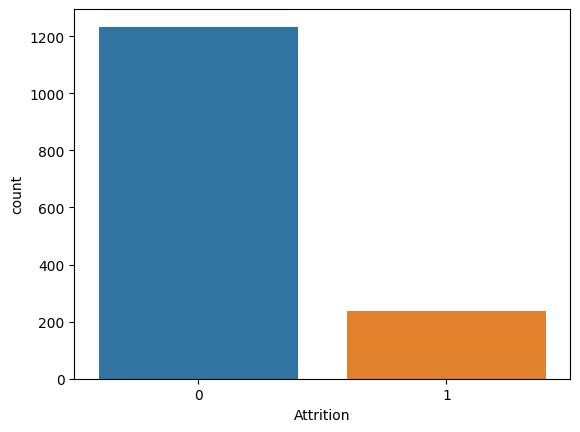

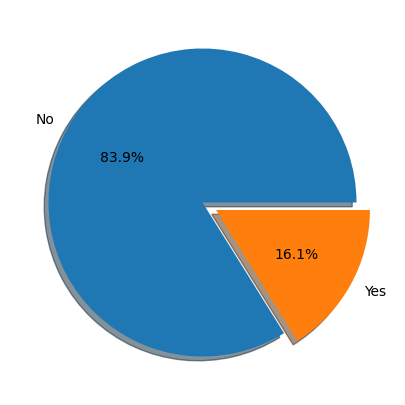

In [11]:
#plot the count of attrition variable
sns.countplot(x='Attrition',data=data)
plt.show()

#plot the distribution of Attirition variable with percentage
plt.figure(figsize=(10,5))
plt.pie(data.Attrition.value_counts(),labels=['No','Yes'],autopct='%1.1f%%',shadow=True,explode=[0,0.1])
plt.show()


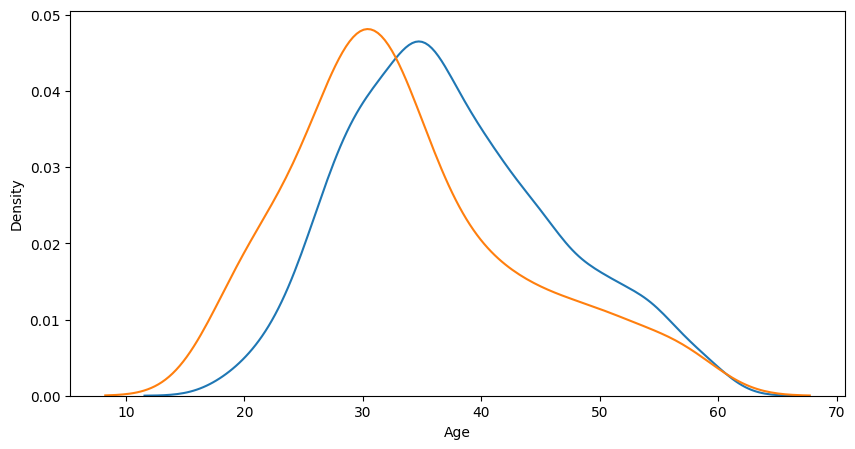

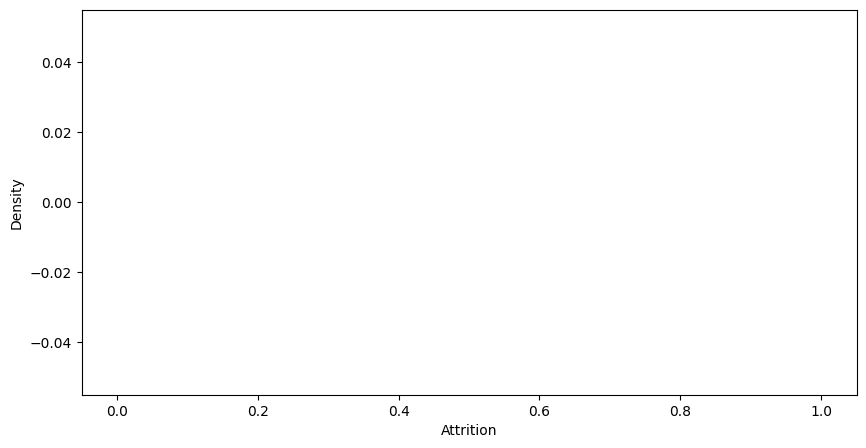

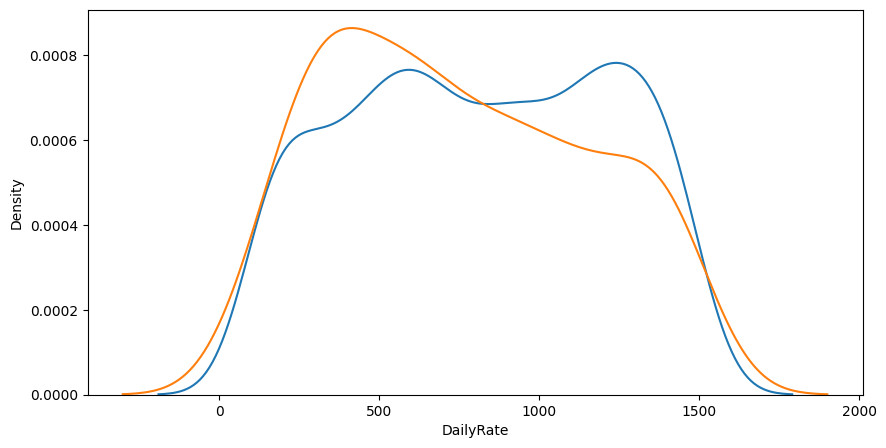

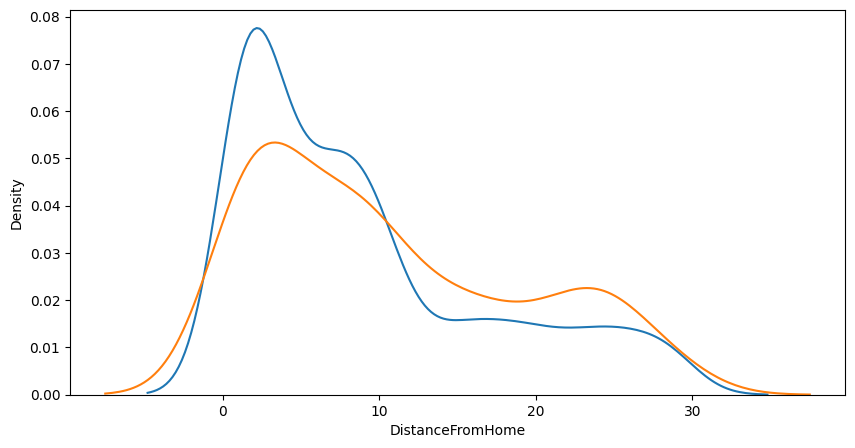

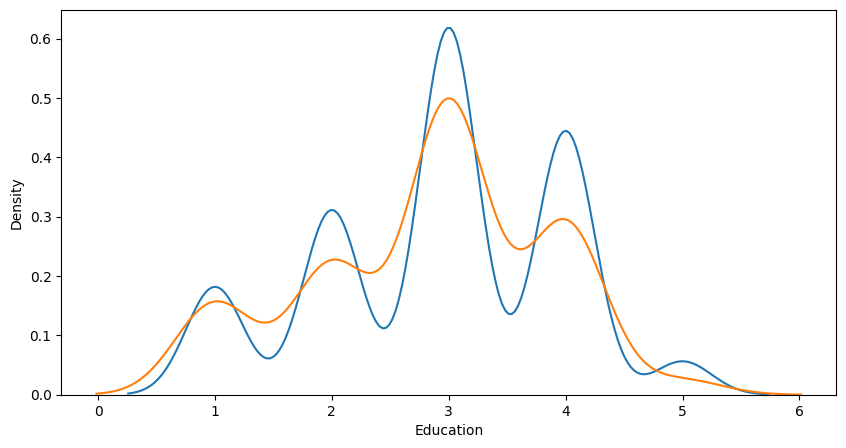

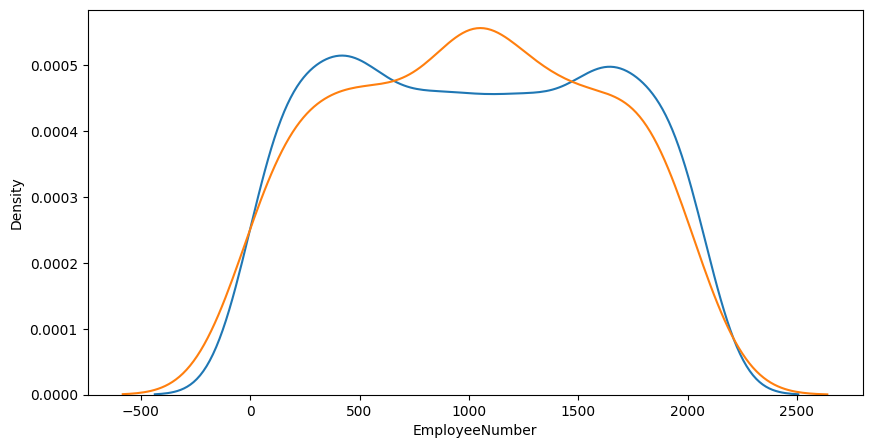

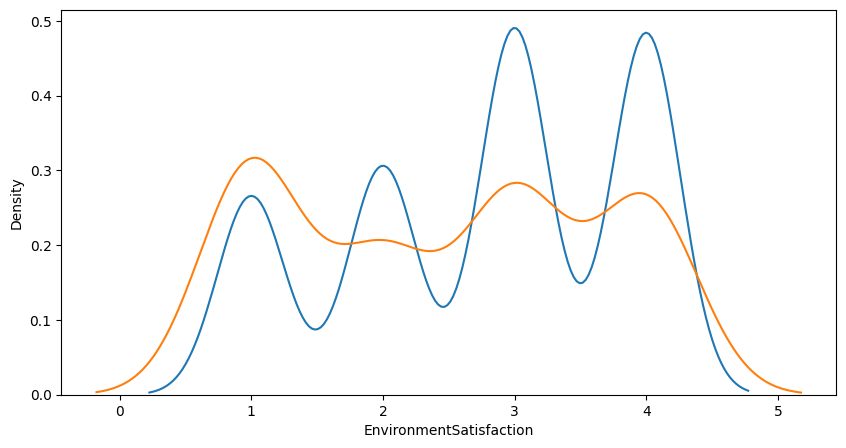

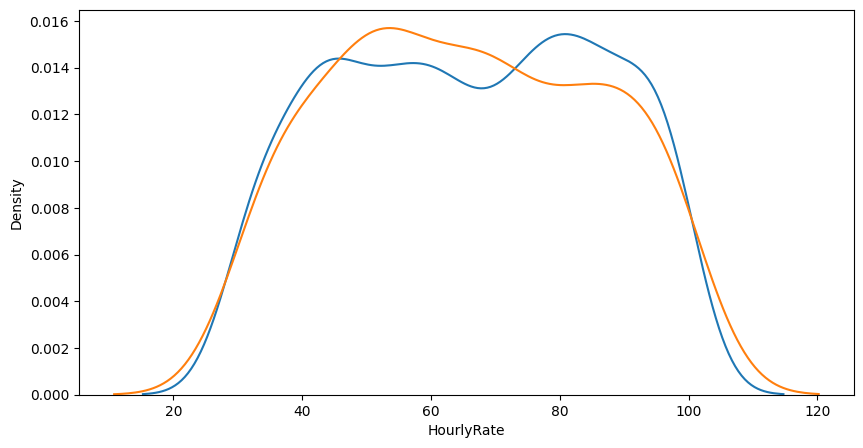

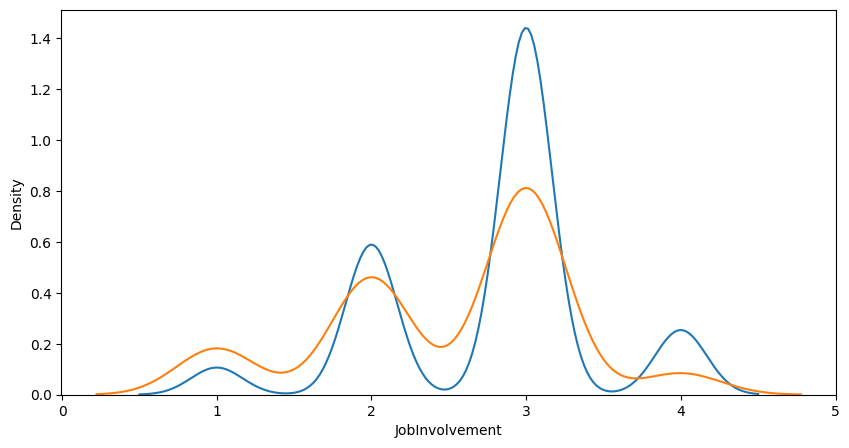

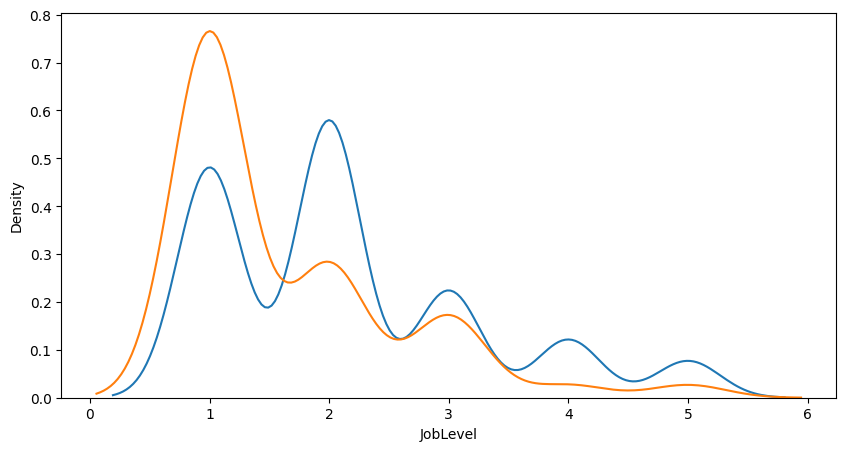

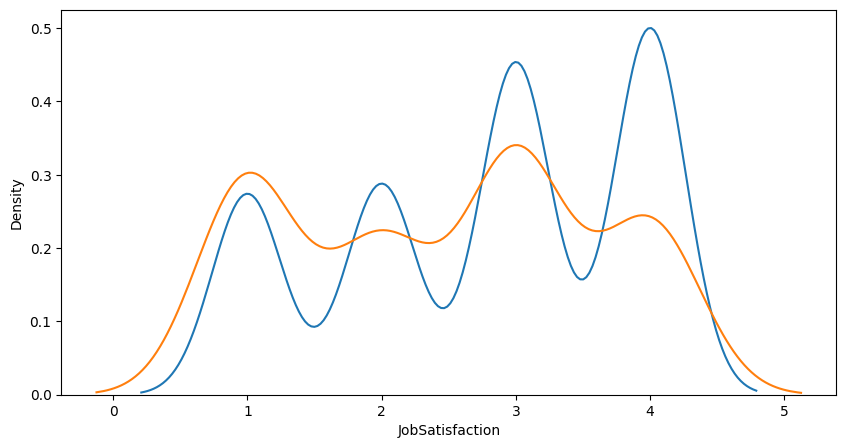

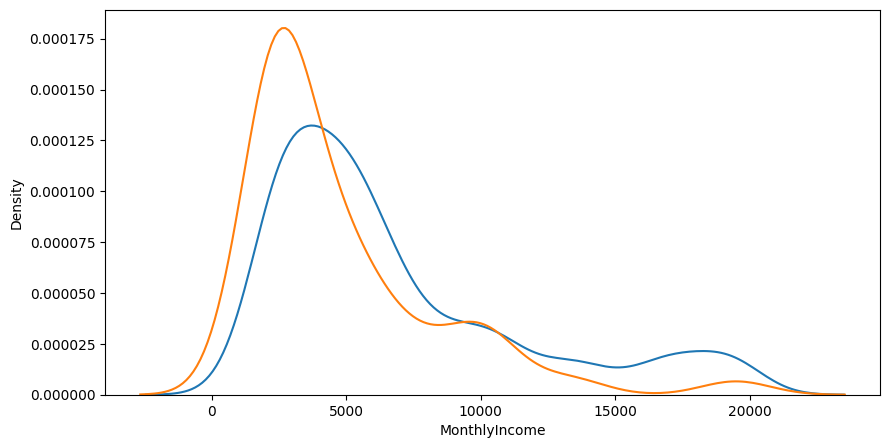

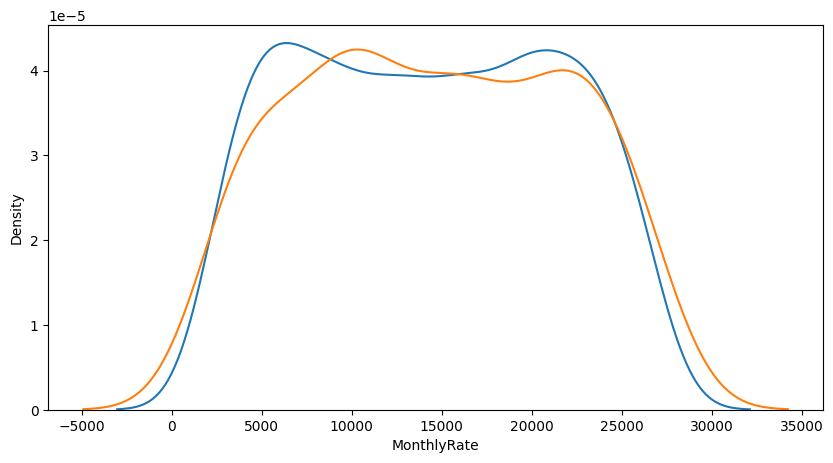

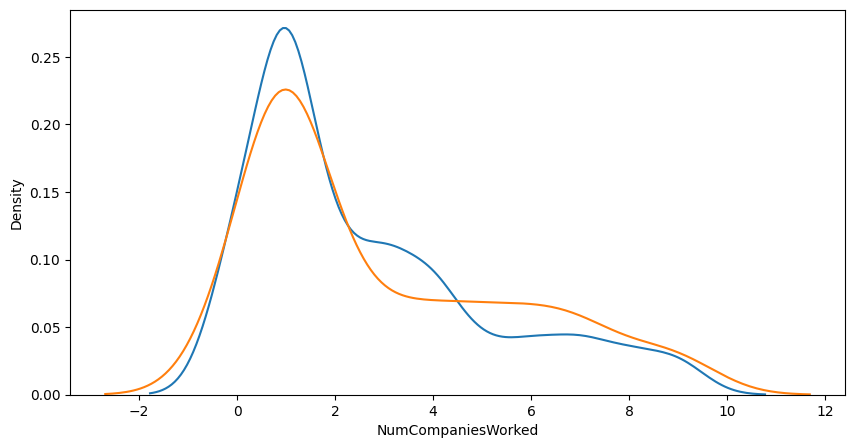

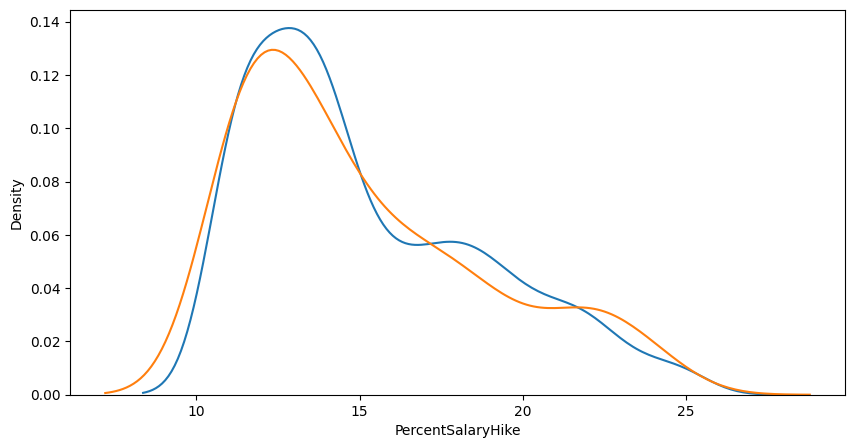

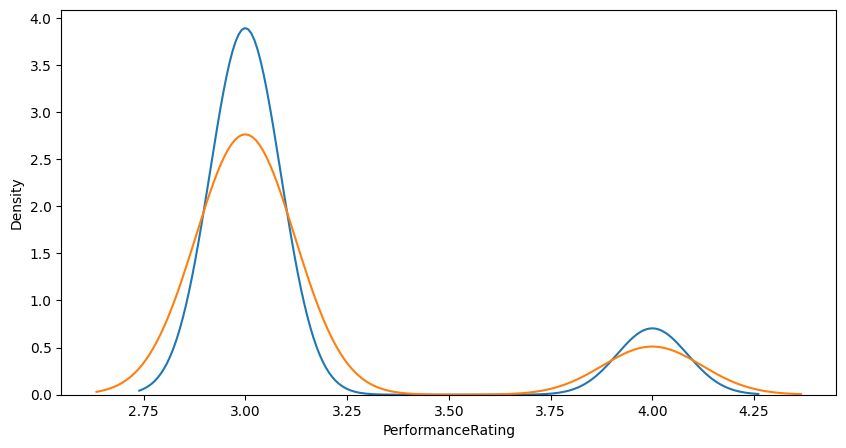

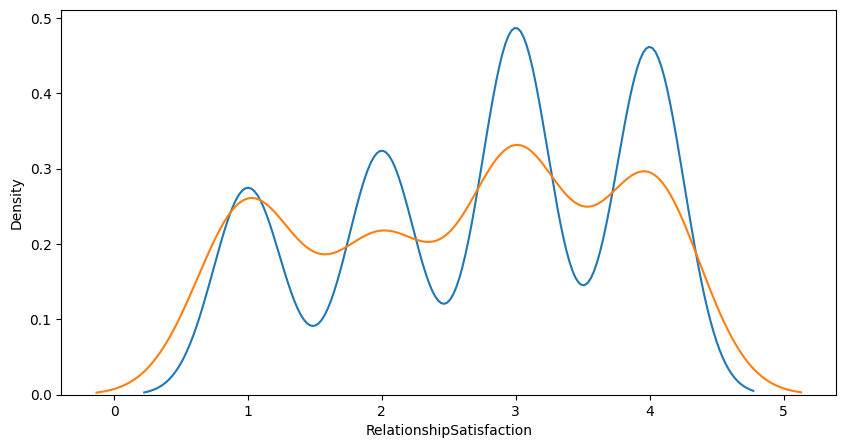

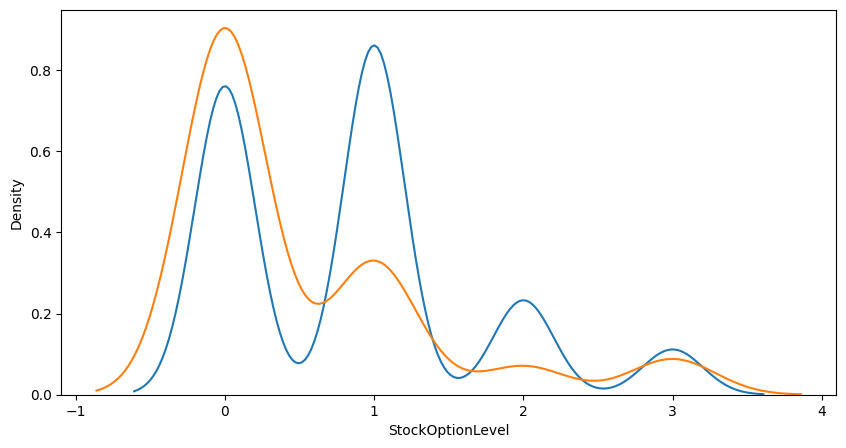

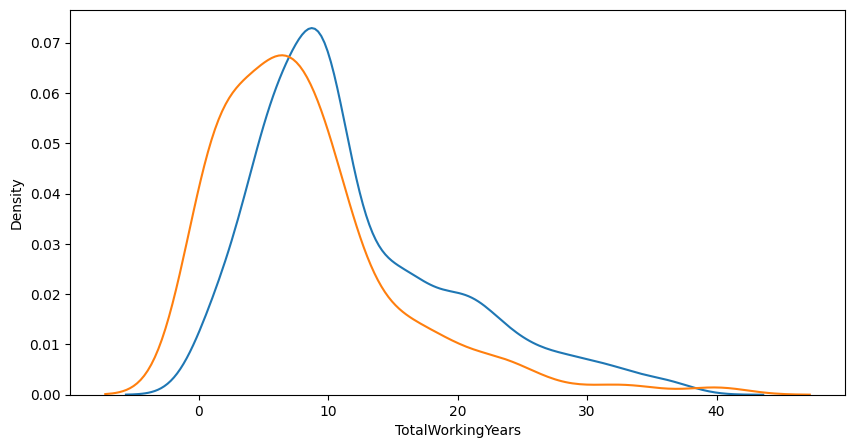

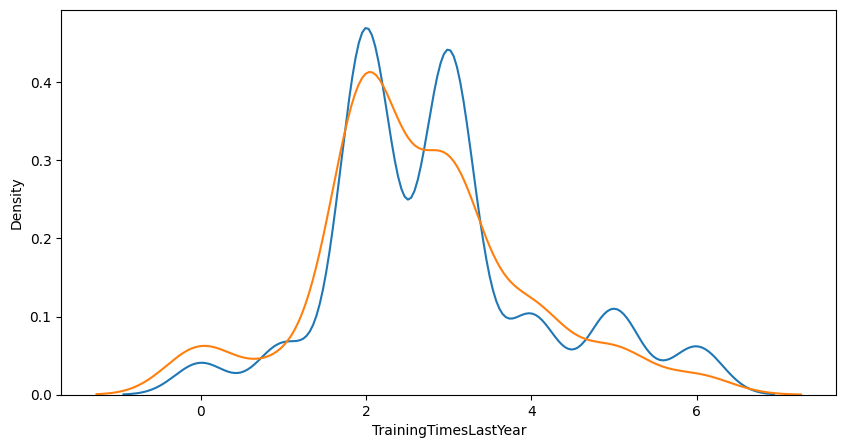

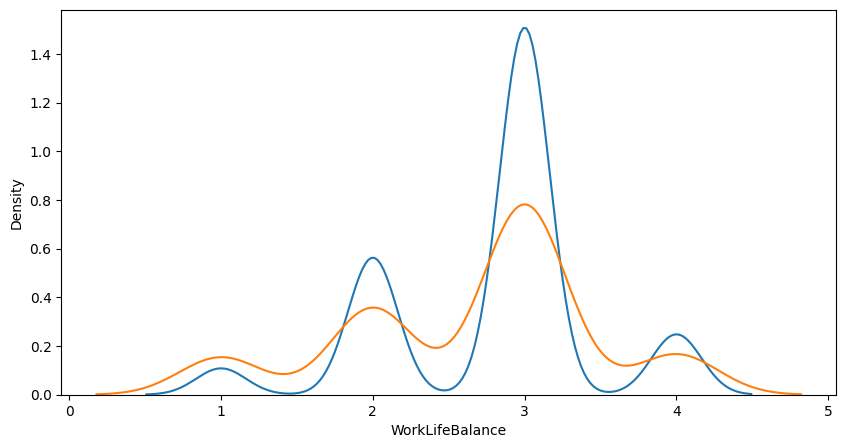

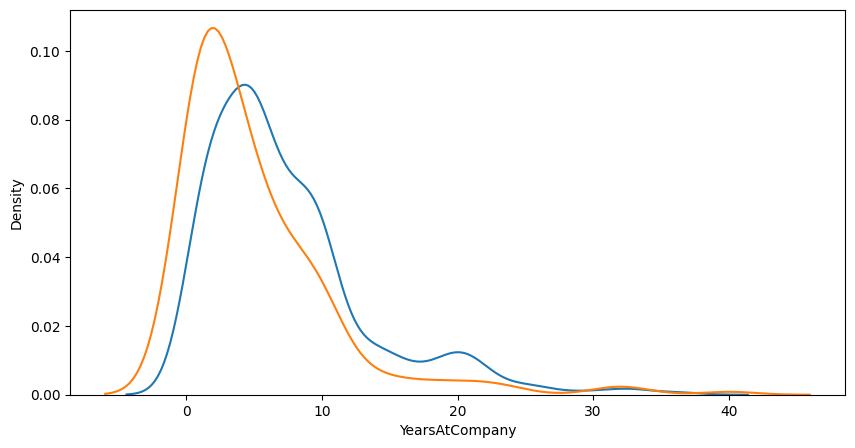

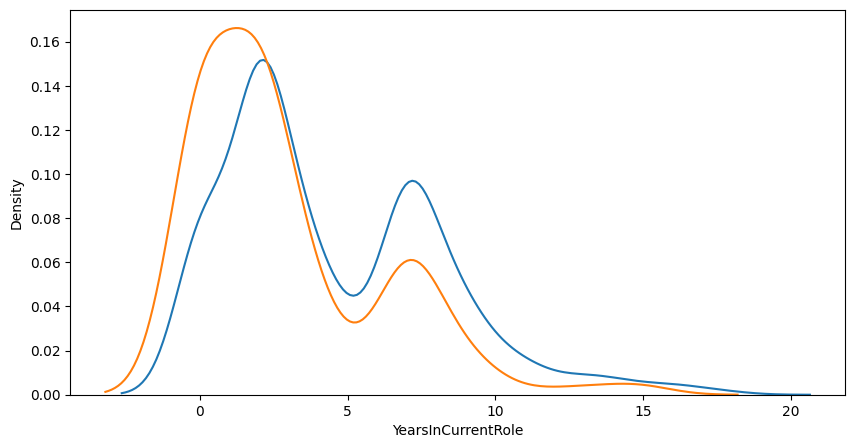

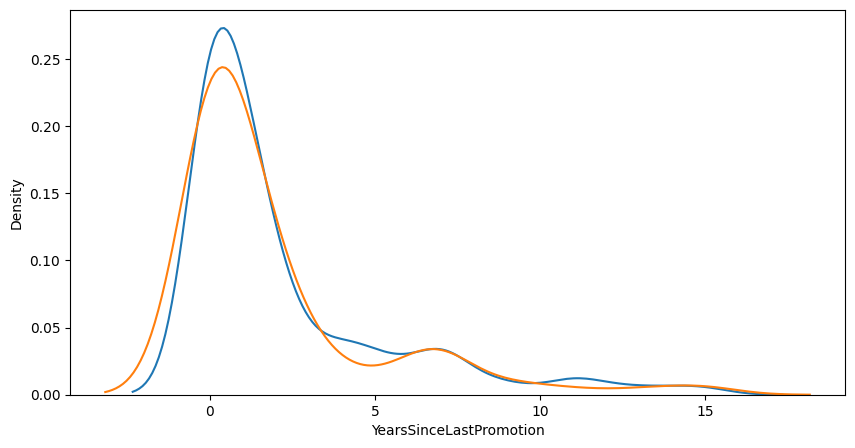

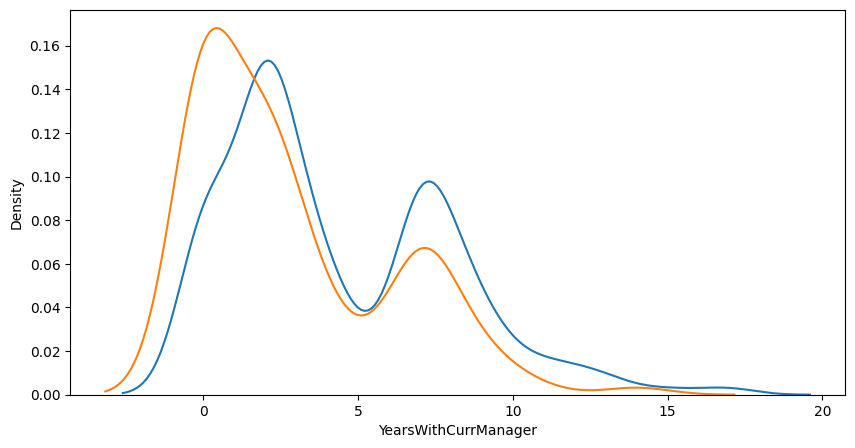

In [12]:
import warnings
warnings.filterwarnings("ignore")
#plot a Attirion stacked histogram and density plot of for every numerical features
for col in data.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(10,5))
    sns.distplot(data[data['Attrition']==0][col],hist=False,label='No')
    sns.distplot(data[data['Attrition']==1][col],hist=False,label='Yes')
    plt.show()

#The distribution of ages is rather regular, and younger workers tend to churn. 
#The majority of workers do not commute closer to home, and it appears that doing so marginally raises the churn rate. 
#hourly_rate, daily_rate and monthly_rate are all quite uniformly with a platykurtic kurtosis (around -1.2). Also, the different rates do not seem to play a role in determening churn.
#The attrition rate is negatively impacted by increased income, as expected given that monthly income is biased to the right.
#The turnover rate does not appear to be impacted by percent salary hike. 

In [13]:
#drop the employee number column
data.drop(columns=['EmployeeNumber'],axis=1, inplace=True) #we drop this column because it is not useful for our model



In [14]:
data.dtypes #data that is in the form of a category in the description of the data is kept as an integer. So, we need to convert them.

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [15]:
#convert the "Education", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance" columns to category
data.Attrition = data.Attrition.astype('category')
data.Education = data.Education.astype('category')
data.EnvironmentSatisfaction = data.EnvironmentSatisfaction.astype('category')
data.JobInvolvement = data.JobInvolvement.astype('category')
data.JobSatisfaction = data.JobSatisfaction.astype('category')
data.PerformanceRating = data.PerformanceRating.astype('category')
data.RelationshipSatisfaction = data.RelationshipSatisfaction.astype('category')
data.WorkLifeBalance = data.WorkLifeBalance.astype('category')


In [16]:
#convert the object data type to category
data.BusinessTravel = data.BusinessTravel.astype('category')
data.Department = data.Department.astype('category')
data.EducationField = data.EducationField.astype('category')
data.Gender = data.Gender.astype('category')
data.JobRole = data.JobRole.astype('category')
data.MaritalStatus = data.MaritalStatus.astype('category')
data.OverTime = data.OverTime.astype('category')


In [17]:
data.dtypes #now all the columns are in the correct form

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int64
JobInvolvement              category
JobLevel                       int64
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance             category
Y

In [18]:
#one hot encode the category type columns
for col in data.columns:
    if data[col].dtype == 'category' or data[col].dtype == 'object':
        data = pd.get_dummies(data, columns=[col], prefix = [col],drop_first=True)
data

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,94,2,5993,19479,8,11,0,...,0,1,1,0,0,0,0,0,0,0
1,49,279,8,61,2,5130,24907,1,23,1,...,1,0,0,1,0,0,1,0,1,0
2,37,1373,2,92,1,2090,2396,6,15,0,...,0,1,1,0,1,0,0,0,1,0
3,33,1392,3,56,1,2909,23159,1,11,0,...,1,0,1,0,0,1,0,0,1,0
4,27,591,2,40,1,3468,16632,9,12,1,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2,2571,12290,4,17,1,...,1,0,0,0,0,1,0,0,1,0
1466,39,613,6,42,3,9991,21457,4,15,1,...,1,0,0,0,0,0,0,0,1,0
1467,27,155,4,87,2,6142,5174,1,20,1,...,1,0,1,1,1,0,0,0,1,0
1468,49,1023,2,63,2,5390,13243,2,14,0,...,1,0,0,0,0,0,1,1,0,0


In [19]:
data.dtypes

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
HourlyRate                           int64
JobLevel                             int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
Attrition_1                          uint8
BusinessTravel_Travel_Frequently     uint8
BusinessTravel_Travel_Rarely         uint8
Department_Research & Development    uint8
Department_Sales                     uint8
Education_2                          uint8
Education_3                          uint8
Education_4

In [20]:
data.rename(columns={'Attrition_1': 'Attrition'}, inplace=True)

In [21]:
data

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,94,2,5993,19479,8,11,0,...,0,1,1,0,0,0,0,0,0,0
1,49,279,8,61,2,5130,24907,1,23,1,...,1,0,0,1,0,0,1,0,1,0
2,37,1373,2,92,1,2090,2396,6,15,0,...,0,1,1,0,1,0,0,0,1,0
3,33,1392,3,56,1,2909,23159,1,11,0,...,1,0,1,0,0,1,0,0,1,0
4,27,591,2,40,1,3468,16632,9,12,1,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2,2571,12290,4,17,1,...,1,0,0,0,0,1,0,0,1,0
1466,39,613,6,42,3,9991,21457,4,15,1,...,1,0,0,0,0,0,0,0,1,0
1467,27,155,4,87,2,6142,5174,1,20,1,...,1,0,1,1,1,0,0,0,1,0
1468,49,1023,2,63,2,5390,13243,2,14,0,...,1,0,0,0,0,0,1,1,0,0


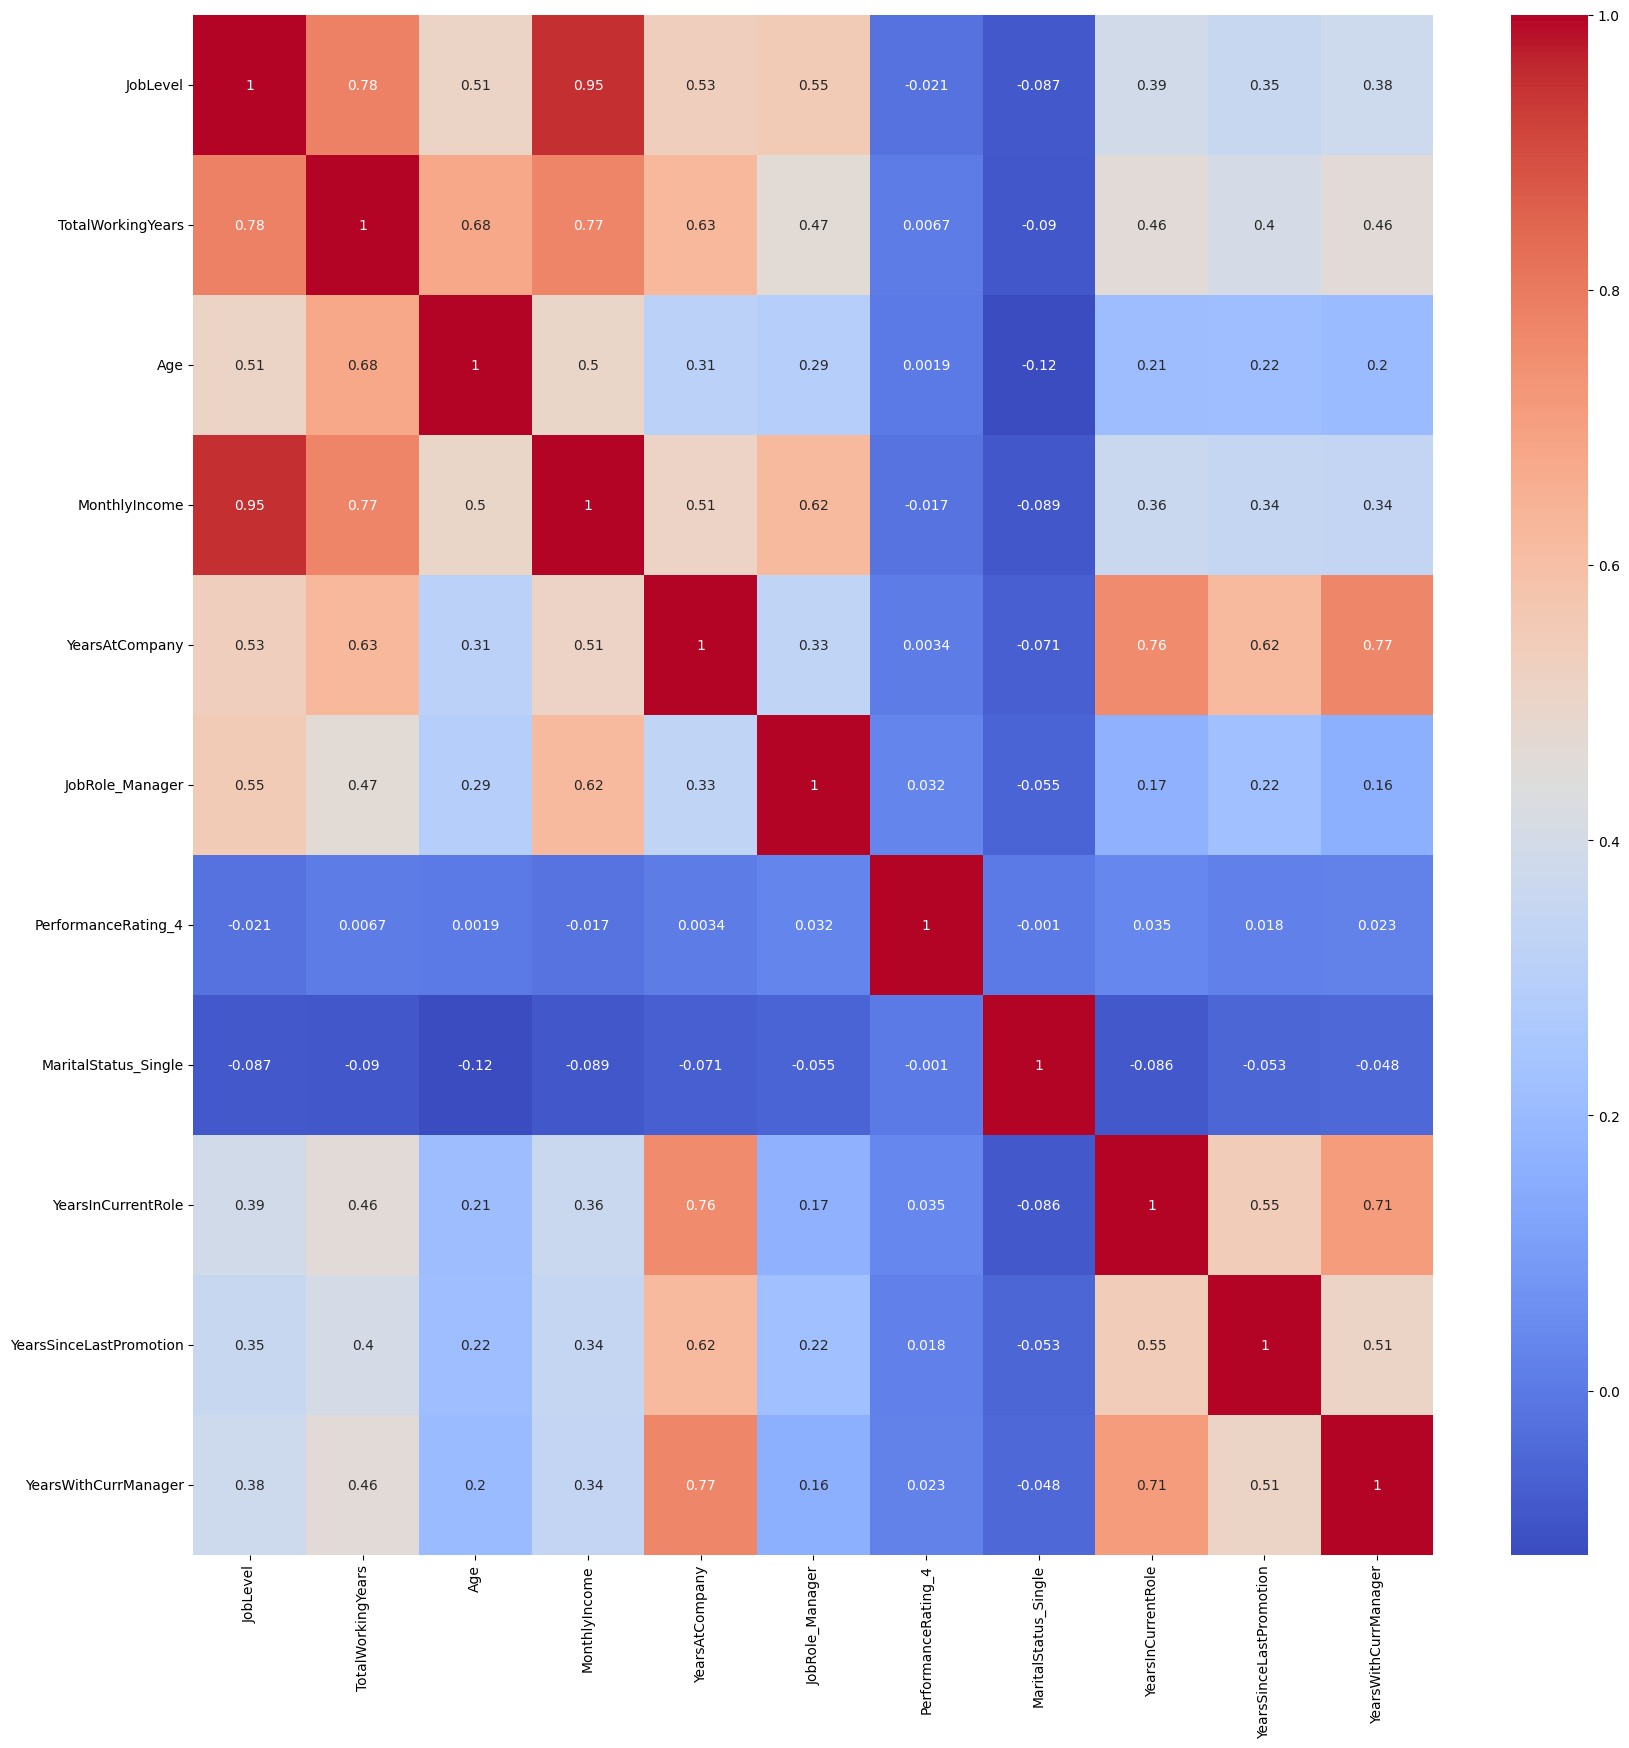

In [22]:
#find absolute of correlation of columns greater than 0.5 and plot heat map
corr = data.corr().abs()
corr_columns = []
for col1 in corr.columns:
    for col2 in corr.columns:
        if col1 != col2 and col not in corr_columns and col2 not in corr_columns:
            if corr[col1][col2] > 0.5:
                corr_columns.append(col2)

#get the to_drop columns and calculate the correlation of them
corr = data[corr_columns].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.show()

In [23]:
#as we expected the correlation of the columns between total working years and other columns is high

EDA Conclusion

In [24]:
"""
We identified a number of characteristics that clearly affect the target variable, including: 

age, total_working_years, years_at_company, years_in_current_role and monthly_income -numerical

Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance -categorical

Total satisfaction, which we created by combining a number of factors, is connected to attrition rate.
In the prediction stage, we can omit the five satisfaction questions and instead use this variable.

We found six non-pertinent numerical variables that were generated at random.

We discovered some highly correlated predictors, and we will also remove years at company to lessen multicollinearity. 

The profile of a worker which is the most like to churn:
    Young
    Low salary
    Working overtime
    Single
    Working as a sales rep or a lab tech
    Has a low overall satisfaction level
    Travels frequently
    Has stock level set to 0
"""    

'\nWe identified a number of characteristics that clearly affect the target variable, including: \n\nage, total_working_years, years_at_company, years_in_current_role and monthly_income -numerical\n\nEducation, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance -categorical\n\nTotal satisfaction, which we created by combining a number of factors, is connected to attrition rate.\nIn the prediction stage, we can omit the five satisfaction questions and instead use this variable.\n\nWe found six non-pertinent numerical variables that were generated at random.\n\nWe discovered some highly correlated predictors, and we will also remove years at company to lessen multicollinearity. \n\nThe profile of a worker which is the most like to churn:\n    Young\n    Low salary\n    Working overtime\n    Single\n    Working as a sales rep or a lab tech\n    Has a low overall satisfaction level\n    Travels frequently\n    Has stock le

Data Preprocessing

In [25]:
#copy the original data
data1 = data.copy()

#convert the Attrition column to int
data1.Attrition = data1.Attrition.astype('int64')

#split the data train, test and validation sets with 80% train, 10% test and 10% validation
train, test = train_test_split(data1, test_size=0.2, random_state=12345)
train, val = train_test_split(train, test_size=0.125, random_state=12345)

#normalize the data with MinMaxScaler train,validation test data sets among themselves

#normalize the train data
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)



#normalize the test data
test = pd.DataFrame(scaler.transform(test), columns=test.columns)

#normalize the validation data
val = pd.DataFrame(scaler.transform(val), columns=val.columns)

#split the train data to X and y
X_train = train.drop(columns=['Attrition'])
y_train = train['Attrition']

#split the test data to X and y
X_test = test.drop(columns=['Attrition'])
y_test = test['Attrition']

#split the validation data to X and y
X_val = val.drop(columns=['Attrition'])
y_val = val['Attrition']




Train the models and show the result


0.9115646258503401
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       128
         1.0       0.75      0.47      0.58        19

    accuracy                           0.91       147
   macro avg       0.84      0.73      0.77       147
weighted avg       0.90      0.91      0.90       147



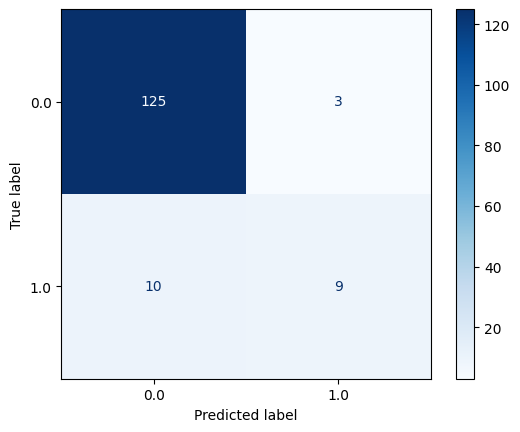

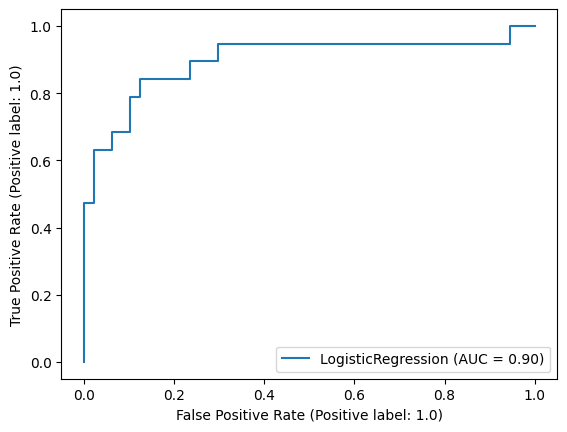

In [26]:
#train the logistic regression model

import time
logreg_model = LogisticRegression()
currtime_logreg = time.time()
logreg_model.fit(X_train, y_train)
diff_logreg = time.time() - currtime_logreg
#predict the validation set
y_pred = logreg_model.predict(X_val)

#print the accuracy score
print(accuracy_score(y_val, y_pred))

#calculate the confusion matrix
confusion_matrix(y_val, y_pred)

#calculate the precision score
precision_score(y_val, y_pred)

#calculate the recall score
recall_score(y_val, y_pred)

#calculate the f1 score
f1_score(y_val, y_pred)

#calculate the roc_auc_score
roc_auc_score(y_val, y_pred)

#calculate the classification report
print(classification_report(y_val, y_pred))

#plot the confusion matrix
plot_confusion_matrix(logreg_model, X_val, y_val, cmap='Blues', values_format='d')
plt.show()

#plot the roc curve
plot_roc_curve(logreg_model, X_val, y_val)
plt.show()



0.8843537414965986
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       128
         1.0       1.00      0.11      0.19        19

    accuracy                           0.88       147
   macro avg       0.94      0.55      0.56       147
weighted avg       0.90      0.88      0.84       147



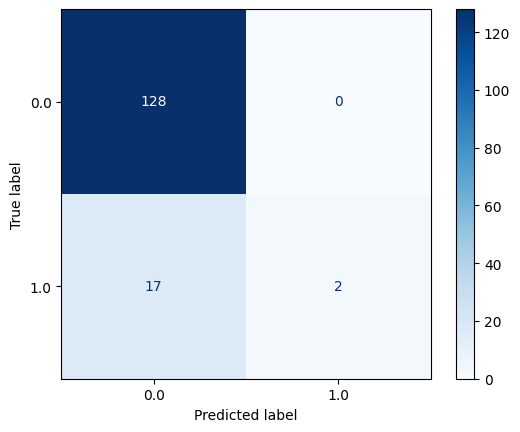

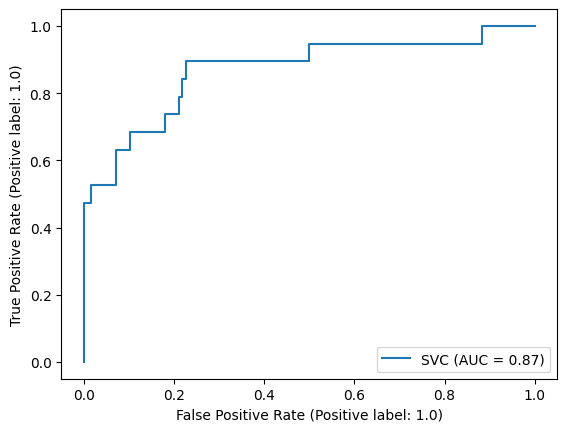

In [27]:
#train the support vector machine model



svm_model = SVC()
currtime_svm = time.time()
svm_model.fit(X_train, y_train)
diff_svm = time.time() - currtime_svm
#predict the validation set
y_pred = svm_model.predict(X_val)

#print the accuracy score
print(accuracy_score(y_val, y_pred))

#calculate the confusion matrix
confusion_matrix(y_val, y_pred)

#calculate the precision score
precision_score(y_val, y_pred)

#calculate the recall score
recall_score(y_val, y_pred)

#calculate the f1 score
f1_score(y_val, y_pred)

#calculate the roc_auc_score
roc_auc_score(y_val, y_pred)

#calculate the classification report
print(classification_report(y_val, y_pred))

#plot the confusion matrix
plot_confusion_matrix(svm_model, X_val, y_val, cmap='Blues', values_format='d')
plt.show()

#plot the roc curve
plot_roc_curve(svm_model, X_val, y_val)
plt.show()

0.891156462585034
[[127   1]
 [ 15   4]]
0.8
0.21052631578947367
0.3333333333333333
0.6013569078947368
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       128
         1.0       0.80      0.21      0.33        19

    accuracy                           0.89       147
   macro avg       0.85      0.60      0.64       147
weighted avg       0.88      0.89      0.86       147



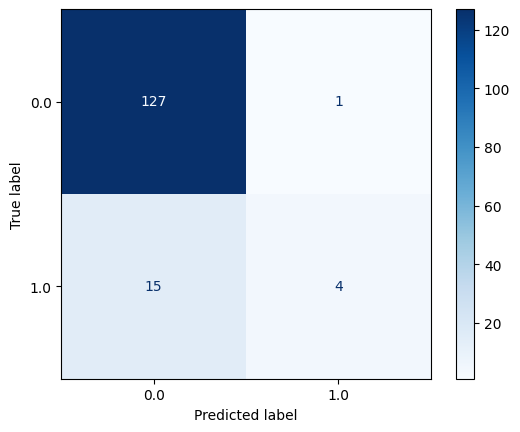

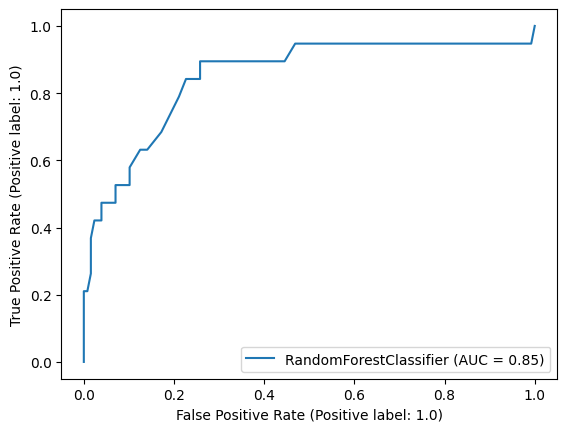

In [28]:
#train the random forest model

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
currtime_rf = time.time()
rf_model.fit(X_train, y_train)
diff_rf = time.time() - currtime_rf

#predict the validation set
y_pred = rf_model.predict(X_val)

#print the accuracy score
print(accuracy_score(y_val, y_pred))

#calculate the confusion matrix
print(confusion_matrix(y_val, y_pred))

#calculate the precision score
print(precision_score(y_val, y_pred))

#calculate the recall score
print(recall_score(y_val, y_pred))

#calculate the f1 score
print(f1_score(y_val, y_pred))

#calculate the roc_auc_score
print(roc_auc_score(y_val, y_pred))

#calculate the classification report
print(classification_report(y_val, y_pred))

#plot the confusion matrix
plot_confusion_matrix(rf_model, X_val, y_val, cmap='Blues', values_format='d')
plt.show()

#plot the roc curve
plot_roc_curve(rf_model, X_val, y_val)
plt.show()


In [29]:
#check the models overfitted or not

#check the logistic regression model overfitted or not
print('Logistic Regression model overfitted: ', logreg_model.score(X_train, y_train) > logreg_model.score(X_val, y_val))

#check the support vector machine model overfitted or not
print('Support Vector Machine model overfitted: ', svm_model.score(X_train, y_train) > svm_model.score(X_val, y_val))

#check the random forest model overfitted or not
print('Random Forest model overfitted: ', rf_model.score(X_train, y_train) > rf_model.score(X_val, y_val))

#check the models accuracy

#check the logistic regression model accuracy
print('Logistic Regression model accuracy: ', logreg_model.score(X_val, y_val))

#check the support vector machine model accuracy
print('Support Vector Machine model accuracy: ', svm_model.score(X_val, y_val))

#check the random forest model accuracy
print('Random Forest model accuracy: ', rf_model.score(X_val, y_val))



Logistic Regression model overfitted:  False
Support Vector Machine model overfitted:  True
Random Forest model overfitted:  True
Logistic Regression model accuracy:  0.9115646258503401
Support Vector Machine model accuracy:  0.8843537414965986
Random Forest model accuracy:  0.891156462585034


In [30]:
#show the logistic regression model classification report and time as dataframe
logreg_report = classification_report(y_val, logreg_model.predict(X_val), output_dict=True)
logreg_report = pd.DataFrame(logreg_report).transpose()
logreg_report['model'] = 'Logistic Regression'
logreg_report['time'] = diff_logreg

#show the support vector machine model classification report and time as dataframe
svm_report = classification_report(y_val, svm_model.predict(X_val), output_dict=True)
svm_report = pd.DataFrame(svm_report).transpose()
svm_report['model'] = 'Support Vector Machine'
svm_report['time'] = diff_svm

#show the random forest model classification report and time as dataframe
rf_report = classification_report(y_val, rf_model.predict(X_val), output_dict=True)
rf_report = pd.DataFrame(rf_report).transpose()
rf_report['model'] = 'Random Forest'
rf_report['time'] = diff_rf

#merge the three models of last row as dataframe  (weighted avg)
report = pd.concat([logreg_report.iloc[-1], svm_report.iloc[-1], rf_report.iloc[-1]], axis=1).transpose()

#set the index as model
report = report.set_index('model')

report





,precision,recall,f1-score,support,time
model,,,,,
Logistic Regression,0.903187,0.911565,0.902757,147.0,0.045859
Support Vector Machine,0.897912,0.884354,0.841145,147.0,0.027688
Random Forest,0.882169,0.891156,0.862232,147.0,0.150213


Select the best model and tune it

In [31]:
#select the best model by f1 score
report.sort_values('f1-score', ascending=False)
#the best model is Logistic Regression model

,precision,recall,f1-score,support,time
model,,,,,
Logistic Regression,0.903187,0.911565,0.902757,147.0,0.045859
Random Forest,0.882169,0.891156,0.862232,147.0,0.150213
Support Vector Machine,0.897912,0.884354,0.841145,147.0,0.027688


In [32]:
#hyperparameter tuning for Logistic Regression model

#set the hyperparameter grid
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'penalty': ['l1', 'l2', 'elasticnet'],
                "solver": ["liblinear", "saga", "lbfgs","sag", "newton-cg"]}
#set the grid search
grid_logreg = GridSearchCV(LogisticRegression(), param_grid, refit=True, n_jobs=-1)
#fit the grid search
grid_logreg.fit(X_train, y_train)

#show the best hyperparameters
print(grid_logreg.best_params_)

/home/berkay/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/berkay/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/berkay/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/berkay/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/berkay/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/berkay/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: Con

{'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [33]:
#hyperparameter tuning for Random Forest model

#set the hyperparameter grid
param_grid = {'n_estimators': [60,80,100, 200,300],
                'max_depth': [5, 10, 15, 20, 25, 30],
                "bootstrap": [True, False],
                'min_samples_leaf': [1, 2, 5, 10],
                "max_features": ["sqrt","log2"]}
#set the grid search
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, n_jobs=-1)
#fit the grid search
grid_rf.fit(X_train, y_train)

#show the best hyperparameters
print(grid_rf.best_params_)


{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 80}


In [34]:
#hyperparameter tuning for Support Vector Machine model

#set the hyperparameter grid
param_grid = {'C': [ 0.1, 1, 10, 100],
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                "gamma": [10, 1, 0.1, 0.01, 0.001, 0.0001]}

#set the grid search
grid_svm = GridSearchCV(SVC(), param_grid, refit=True, n_jobs=-1)
#fit the grid search
grid_svm.fit(X_train, y_train)

#show the best hyperparameters
print(grid_svm.best_params_)




{'C': 10, 'gamma': 10, 'kernel': 'linear'}


In [35]:
#calculate the classification report for the best hyperparameters of Logistic Regression model
grid_logreg_report = classification_report(y_val, grid_logreg.predict(X_val), output_dict=True)
grid_logreg_report = pd.DataFrame(grid_logreg_report).transpose()
grid_logreg_report['model'] = 'Logistic Regression_tuned'

#calculate the classification report for the best hyperparameters of Random Forest model
grid_rf_report = classification_report(y_val, grid_rf.predict(X_val), output_dict=True)
grid_rf_report = pd.DataFrame(grid_rf_report).transpose()
grid_rf_report['model'] = 'Random Forest_tuned'

#calculate the classification report for the best hyperparameters of Support Vector Machine model
grid_svm_report = classification_report(y_val, grid_svm.predict(X_val), output_dict=True)
grid_svm_report = pd.DataFrame(grid_svm_report).transpose()
grid_svm_report['model'] = 'Support Vector Machine_tuned'

#merge the three models of last row as dataframe  (weighted avg)
grid_report = pd.concat([grid_logreg_report.iloc[-1], grid_rf_report.iloc[-1], grid_svm_report.iloc[-1]], axis=1).transpose()

#set the index as model
grid_report = grid_report.set_index('model')

#merge the two reports
report = pd.concat([report, grid_report], axis=0)
report

,precision,recall,f1-score,support,time
model,,,,,
Logistic Regression,0.903187,0.911565,0.902757,147.0,0.045859
Support Vector Machine,0.897912,0.884354,0.841145,147.0,0.027688
Random Forest,0.882169,0.891156,0.862232,147.0,0.150213
Logistic Regression_tuned,0.903187,0.911565,0.902757,147.0,NaN
Random Forest_tuned,0.88625,0.897959,0.879275,147.0,NaN
Support Vector Machine_tuned,0.906433,0.911565,0.908287,147.0,NaN


Select the best features

In [36]:
#find 5 best features for Logistic Regression model
from sklearn.feature_selection import SelectKBest, chi2
#set the SelectKBest
select = SelectKBest(chi2, k=5)
#fit the SelectKBest
select.fit(X_train, y_train)
#show the best features
selected_features = X_train.columns[select.get_support()]
selected_features




Index(['BusinessTravel_Travel_Frequently', 'JobRole_Research Director',
       'JobRole_Sales Representative', 'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')

In [37]:
#fit the Logistic Regression model with the best hyperparameters and best features 'C': 1, 'penalty': 'l2', 'solver': 'saga'
logreg_model_best_features = LogisticRegression(C=1, penalty='l2', solver='saga')
logreg_model_best_features.fit(X_train[selected_features], y_train)

#show the classification report for the best model
logreg_report = classification_report(y_val, logreg_model_best_features.predict(X_val[selected_features]), output_dict=True)

logreg_report = pd.DataFrame(logreg_report).transpose()
logreg_report

,precision,recall,f1-score,support
0.0,0.881944,0.992188,0.933824,128.000000
1.0,0.666667,0.105263,0.181818,19.000000
accuracy,0.877551,0.877551,0.877551,0.877551
macro avg,0.774306,0.548725,0.557821,147.000000
weighted avg,0.854119,0.877551,0.836626,147.000000


In [38]:
#show the classification report 5 features model on test data
logreg_report = classification_report(y_test, logreg_model_best_features.predict(X_test[selected_features]), output_dict=True)

logreg_report_best_features = pd.DataFrame(logreg_report).transpose()
logreg_report_best_features



,precision,recall,f1-score,support
0.0,0.875000,0.992126,0.929889,254.000000
1.0,0.666667,0.100000,0.173913,40.000000
accuracy,0.870748,0.870748,0.870748,0.870748
macro avg,0.770833,0.546063,0.551901,294.000000
weighted avg,0.846655,0.870748,0.827035,294.000000


In [39]:
#show the classification report grid_logred model on test data
logreg_report_best_model = classification_report(y_test, grid_logreg.predict(X_test), output_dict=True)

logreg_report_best_model = pd.DataFrame(logreg_report_best_model).transpose()
logreg_report_best_model


,precision,recall,f1-score,support
0.0,0.919118,0.984252,0.950570,254.000000
1.0,0.818182,0.450000,0.580645,40.000000
accuracy,0.911565,0.911565,0.911565,0.911565
macro avg,0.868650,0.717126,0.765608,294.000000
weighted avg,0.905385,0.911565,0.900240,294.000000


In [40]:
import pickle
with open('best_model.sav', 'wb') as files:
    pickle.dump(grid_logreg, files)
